In [1]:
!pip install gdown


In [2]:
!gdown https://drive.google.com/uc?id=12qVwADYVYU8tIBvJ0JX9ZjHKrLg0-iPp

Downloading...
From (original): https://drive.google.com/uc?id=12qVwADYVYU8tIBvJ0JX9ZjHKrLg0-iPp
From (redirected): https://drive.google.com/uc?id=12qVwADYVYU8tIBvJ0JX9ZjHKrLg0-iPp&confirm=t&uuid=ec15d7c1-2539-4a33-8cbd-b0fd65778d9c
To: /content/parsed_uniprot_data.csv
100% 1.04G/1.04G [00:13<00:00, 79.3MB/s]


In [3]:
!gunzip uniprot_sprot.dat.gz

gzip: uniprot_sprot.dat.gz: No such file or directory


In [4]:
import pandas as pd
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

def prepare_data(file_path):
    # Load the data
    data = pd.read_csv('/content/parsed_uniprot_data.csv')
    print("Columns in DataFrame:", data.columns)

    # Convert all features to string type and handle NaN values
    for col in ['ID', 'AC', 'description', 'gene_name', 'database_references']:
        data[col] = data[col].fillna('')  # Replace NaN with empty string
        data[col] = data[col].astype(str)  # Convert to string

    # Combine text features into a single sequence
    data['combined_features'] = data['ID'] + ' ' + \
                               data['AC'] + ' ' + \
                               data['description'] + ' ' + \
                               data['gene_name'] + ' ' + \
                               data['database_references']
# Convert text to lowercase and remove special characters
    data['combined_features'] = data['combined_features'].str.lower()
    data['combined_features'] = data['combined_features'].str.replace(r'[^ɡ\w\s]', '')

    # Print some examples to verify the processing
    print("\nSample processed features:")
    print(data['combined_features'].head())

    # Tokenize the text
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(data['combined_features'])

    # Convert text to sequences
    X = tokenizer.texts_to_sequences(data['combined_features'])

    # Pad sequences to ensure uniform length
    max_length = 500  # Adjust this based on your data distribution
    X = pad_sequences(X, maxlen=max_length, padding='post')

    # Encode target variable (organism_classification)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data['organism_classification'])
     # Save tokenizer and label encoder for later use
    with open('tokenizer.pkl', 'wb') as f:
        pickle.dump(tokenizer, f)
    with open('label_encoder.pkl', 'wb') as f:
        pickle.dump(label_encoder, f)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Print shapes and vocabulary info for verification
    print("\nData shapes:")
    print("X shape:", X.shape)
    print("Vocabulary size:", len(tokenizer.word_index))
    print("Number of classes:", len(np.unique(y)))

    return X_train, X_test, y_train, y_test, tokenizer.word_index
try:
    # Call the function and save the output
    X_train, X_test, y_train, y_test, word_index = prepare_data(
        "/content/parsed_uniprot_data.csv"
    )

    # Save the processed data
    with open('X_train.pkl', 'wb') as f:
        pickle.dump(X_train, f)
    with open('X_test.pkl', 'wb') as f:
        pickle.dump(X_test, f)
    with open('y_train.pkl', 'wb') as f:
        pickle.dump(y_train, f)
    with open('y_test.pkl', 'wb') as f:
        pickle.dump(y_test, f)

    print("\nFinal shapes:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

except Exception as e:
    print(f"Error occurred: {str(e)}")
    # The 'data' variable is not defined if the error occurs during pd.read_csv,
    # so accessing it here would cause a NameError.
    # To debug, you might want to inspect the file system or re-run previous steps.


Columns in DataFrame: Index(['ID', 'AC', 'description', 'gene_name', 'organism_classification',
       'database_references'],
      dtype='object')

Sample processed features:
0    001r_frg3g q6gzx4 recname: full=putative trans...
1    002l_frg3g q6gzx3 recname: full=uncharacterize...
2    002r_iiv3 q197f8 recname: full=uncharacterized...
3    003l_iiv3 q197f7 recname: full=uncharacterized...
4    003r_frg3g q6gzx2 recname: full=uncharacterize...
Name: combined_features, dtype: object

Data shapes:
X shape: (572214, 500)
Vocabulary size: 4744805
Number of classes: 6220

Final shapes:
X_train shape: (457771, 500)
X_test shape: (114443, 500)
y_train shape: (457771,)
y_test shape: (114443,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
11445/11445 ━━━━━━━━━━━━━━━━━━━━ 133s 10ms/step - accuracy: 0.1042 - loss: 6.0676 - val_accuracy: 0.2091 - val_loss: 4.1739 - learning_rate: 1.0000e-04
Epoch 2/10
11445/11445 ━━━━━━━━━━━━━━━━━━━━ 110s 10ms/step - accuracy: 0.2216 - loss: 4.0352 - val_accuracy: 0.2677 - val_loss: 3.6785 - learning_rate: 1.0000e-04
Epoch 3/10
11445/11445 ━━━━━━━━━━━━━━━━━━━━ 111s 10ms/step - accuracy: 0.2736 - loss: 3.5884 - val_accuracy: 0.3420 - val_loss: 3.1430 - learning_rate: 1.0000e-04
Epoch 4/10
11445/11445 ━━━━━━━━━━━━━━━━━━━━ 111s 10ms/step - accuracy: 0.3119 - loss: 3.3165 - val_accuracy: 0.3908 - val_loss: 2.8567 - learning_rate: 1.0000e-04
Epoch 5/10
11445/11445 ━━━━━━━━━━━━━━━━━━━━ 112s 10ms/step - accuracy: 0.3373 - loss: 3.1522 - val_accuracy: 0.3778 - val_loss: 2.9719 - learning_rate: 1.0000e-04
Epoch 6/10
11445/11445 ━━━━━━━━━━━━━━━━━━━━ 113s 10ms/step - accuracy: 0.3591 - loss: 3.0329 - val_accuracy: 0.4367 - val_loss: 2.5915 - learning_rate: 1.0000e-04
Epoch 7/10
11445/11445

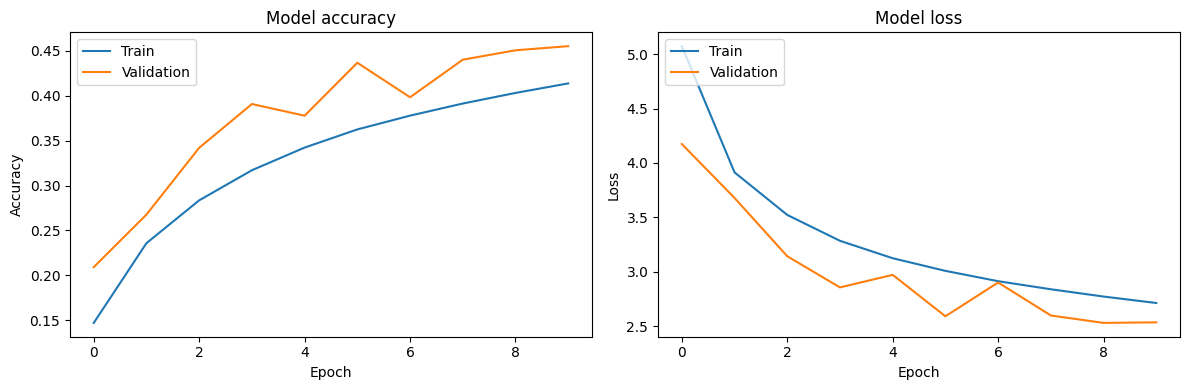

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pickle

# Load the prepared data
with open('X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)
with open('X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Reshape the data for CNN (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# Define the CNN model
model = Sequential([
    # First CNN block
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same',
           input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Second CNN block
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Third CNN block
    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    # Flatten and Dense layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6220, activation='softmax')  # Output layer (same as your original model)
])
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)
# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the model
model.save("cnn_model_multiclass.keras")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
